In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance

In [16]:
# GET BTC - USD OHLCV DATA 1h INTERVAL from 2022-01-01 to today
btc = yfinance.Ticker('BTC-USD')
btc_hist = btc.history(start='2022-01-01')
btc_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,46311.746094,47827.312500,46288.484375,47686.812500,24582667004,0.0,0.0
2022-01-02 00:00:00+00:00,47680.925781,47881.406250,46856.937500,47345.218750,27951569547,0.0,0.0
2022-01-03 00:00:00+00:00,47343.542969,47510.726562,45835.964844,46458.117188,33071628362,0.0,0.0
2022-01-04 00:00:00+00:00,46458.851562,47406.546875,45752.464844,45897.574219,42494677905,0.0,0.0
2022-01-05 00:00:00+00:00,45899.359375,46929.046875,42798.222656,43569.003906,36851084859,0.0,0.0


In [17]:
btc_hist['m_avg_7'] = btc_hist['Close'].rolling(window=7).mean()
btc_hist['m_avg_25'] = btc_hist['Close'].rolling(window=25).mean()
btc_hist['m_avg_99'] = btc_hist['Close'].rolling(window=99).mean()
btc_hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,m_avg_7,m_avg_25,m_avg_99
Date,,,,,,,,,,
2024-10-24 00:00:00+00:00,66653.703125,68798.960938,66454.101562,68161.054688,31414428647,0.0,0.0,67872.247768,64378.212656,62088.126657
2024-10-25 00:00:00+00:00,68165.296875,68722.156250,65521.792969,66642.414062,41469984306,0.0,0.0,67618.479911,64510.729219,62115.079664
2024-10-26 00:00:00+00:00,66628.734375,67317.921875,66360.593750,67014.695312,19588098156,0.0,0.0,67425.902902,64757.836719,62118.155816
2024-10-27 00:00:00+00:00,67023.476562,68221.312500,66847.226562,67929.296875,16721307878,0.0,0.0,67272.702009,65049.697188,62125.889639
2024-10-28 00:00:00+00:00,67939.539062,69854.609375,67560.382812,69554.078125,36601798656,0.0,0.0,67585.020089,65401.484219,62140.026555


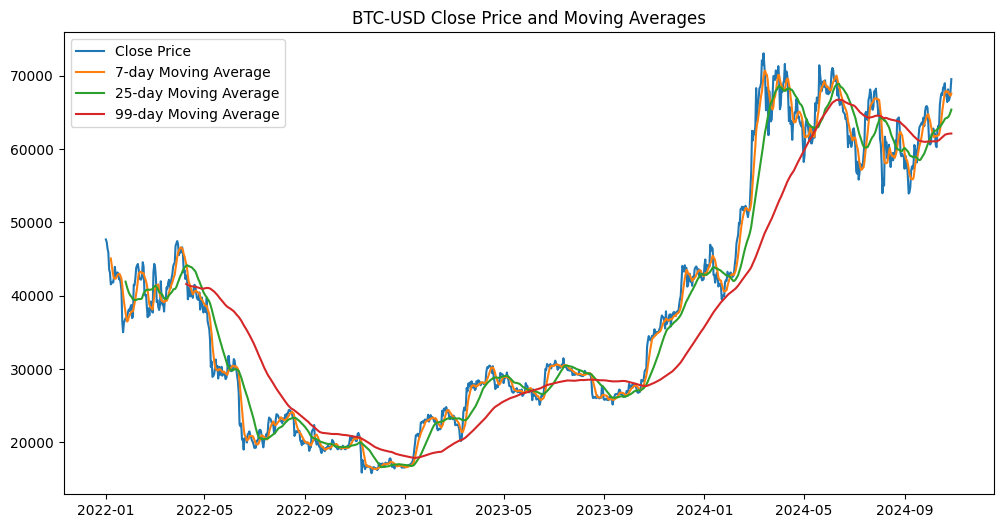

In [19]:
# plot close price and moving averages
plt.figure(figsize=(12,6))
plt.plot(btc_hist['Close'], label='Close Price')
plt.plot(btc_hist['m_avg_7'], label='7-day Moving Average')
plt.plot(btc_hist['m_avg_25'], label='25-day Moving Average')
plt.plot(btc_hist['m_avg_99'], label='99-day Moving Average')
plt.title('BTC-USD Close Price and Moving Averages')
plt.legend()
plt.show()

In [21]:
# add column for derivative of moving averages
btc_hist['m_avg_7_diff'] = btc_hist['m_avg_7'].pct_change()
btc_hist['m_avg_25_diff'] = btc_hist['m_avg_25'].pct_change()
btc_hist['m_avg_99_diff'] = btc_hist['m_avg_99'].pct_change()
btc_hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,m_avg_7,m_avg_25,m_avg_99,m_avg_7_diff,m_avg_25_diff,m_avg_99_diff
Date,,,,,,,,,,,,,
2024-10-24 00:00:00+00:00,66653.703125,68798.960938,66454.101562,68161.054688,31414428647,0.0,0.0,67872.247768,64378.212656,62088.126657,0.001605,0.001572,0.000658
2024-10-25 00:00:00+00:00,68165.296875,68722.156250,65521.792969,66642.414062,41469984306,0.0,0.0,67618.479911,64510.729219,62115.079664,-0.003739,0.002058,0.000434
2024-10-26 00:00:00+00:00,66628.734375,67317.921875,66360.593750,67014.695312,19588098156,0.0,0.0,67425.902902,64757.836719,62118.155816,-0.002848,0.003830,0.000050
2024-10-27 00:00:00+00:00,67023.476562,68221.312500,66847.226562,67929.296875,16721307878,0.0,0.0,67272.702009,65049.697188,62125.889639,-0.002272,0.004507,0.000125
2024-10-28 00:00:00+00:00,67939.539062,69854.609375,67560.382812,69554.078125,36601798656,0.0,0.0,67585.020089,65401.484219,62140.026555,0.004643,0.005408,0.000228


In [22]:
btc_hist.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
btc_hist.dropna(inplace=True)
btc_hist.tail()

,Open,High,Low,Close,Volume,m_avg_7,m_avg_25,m_avg_99,m_avg_7_diff,m_avg_25_diff,m_avg_99_diff
Date,,,,,,,,,,,
2024-10-24 00:00:00+00:00,66653.703125,68798.960938,66454.101562,68161.054688,31414428647,67872.247768,64378.212656,62088.126657,0.001605,0.001572,0.000658
2024-10-25 00:00:00+00:00,68165.296875,68722.156250,65521.792969,66642.414062,41469984306,67618.479911,64510.729219,62115.079664,-0.003739,0.002058,0.000434
2024-10-26 00:00:00+00:00,66628.734375,67317.921875,66360.593750,67014.695312,19588098156,67425.902902,64757.836719,62118.155816,-0.002848,0.003830,0.000050
2024-10-27 00:00:00+00:00,67023.476562,68221.312500,66847.226562,67929.296875,16721307878,67272.702009,65049.697188,62125.889639,-0.002272,0.004507,0.000125
2024-10-28 00:00:00+00:00,67939.539062,69854.609375,67560.382812,69554.078125,36601798656,67585.020089,65401.484219,62140.026555,0.004643,0.005408,0.000228


In [24]:
btc_hist.to_parquet('./btc_hist.parquet')